<a href="https://colab.research.google.com/github/Kingestif/PennyLane-Bell-State/blob/main/PennyLane_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

##Create the Bell State Circuit


🔹 Probability Distribution: [0.5 0.  0.  0.5]


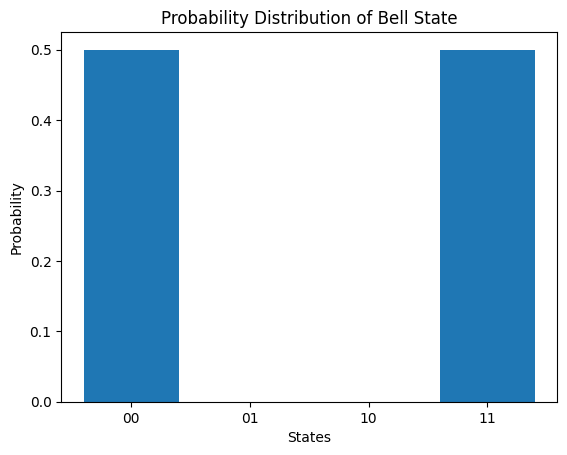

🔸 Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
🔹 Measurement Counts (1000 shots): Counter({(np.int64(0), np.int64(0)): 521, (np.int64(1), np.int64(1)): 479})


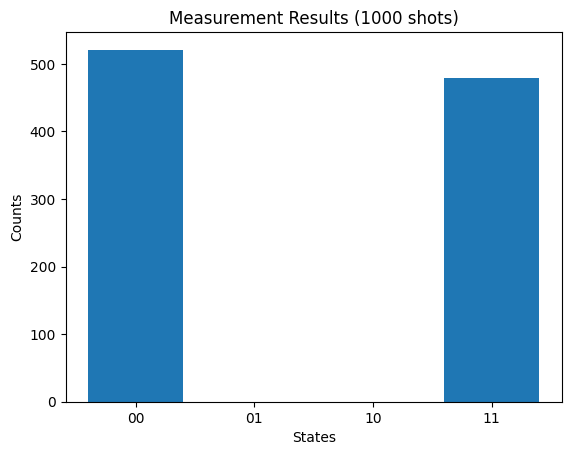

In [ ]:
# Install PennyLane
!pip install pennylane

# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import collections

# Set up the quantum device (no shots for probability & statevector)
dev = qml.device("default.qubit", wires=2)

# Bell State Circuit – Get Probabilities
@qml.qnode(dev)
def bell_circuit():
    qml.Hadamard(wires=0)        # Superposition
    qml.CNOT(wires=[0, 1])       # Entanglement
    return qml.probs(wires=[0, 1])

probs = bell_circuit()
print("🔹 Probability Distribution:", probs)

# Visualize the probability distribution
plt.bar(['00', '01', '10', '11'], probs)
plt.title("Probability Distribution of Bell State")
plt.xlabel("States")
plt.ylabel("Probability")
plt.show()

# Bonus: Show the statevector
@qml.qnode(dev)
def bell_statevector():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

state = bell_statevector()
print("🔸 Statevector:", state)

# Bonus: Show measurement samples (with shots)
dev_sample = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev_sample)
def bell_sample_many():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])

samples = bell_sample_many()

# Count and show the measurement results
counts = collections.Counter([tuple(s) for s in samples])
print("🔹 Measurement Counts (1000 shots):", counts)

# Bar plot of measurement results
labels = ['00', '01', '10', '11']
values = [counts.get((0, 0), 0), counts.get((0, 1), 0),
          counts.get((1, 0), 0), counts.get((1, 1), 0)]

plt.bar(labels, values)
plt.title("Measurement Results (1000 shots)")
plt.xlabel("States")
plt.ylabel("Counts")
plt.show()


# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

🔹 3-Qubit GHZ State Probabilities: [0.5 0.  0.  0.  0.  0.  0.  0.5]


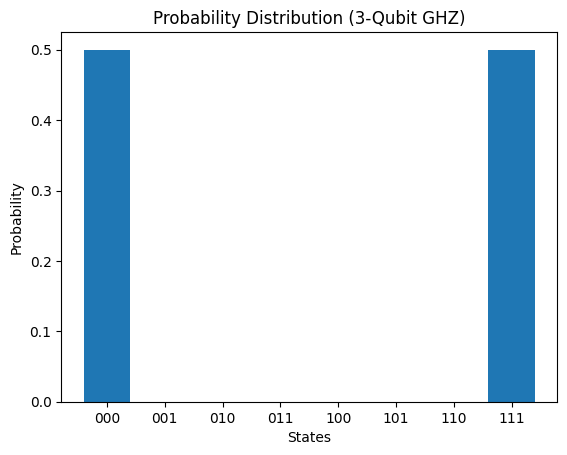

🔸 4-Qubit GHZ State Probabilities: [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]


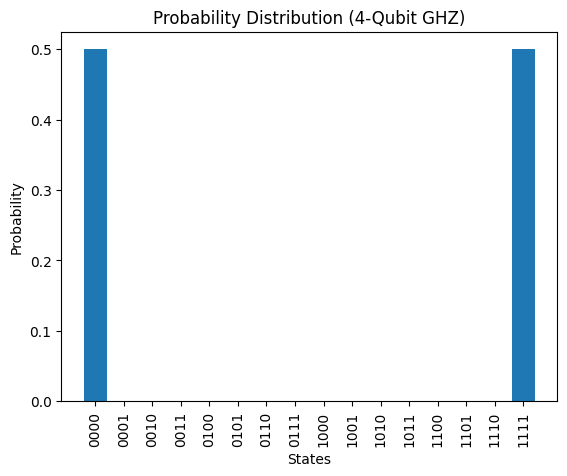

In [ ]:
# Install PennyLane
!pip install pennylane

# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import collections

# 3-Qubit GHZ State
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def ghz_3_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    return qml.probs(wires=[0, 1, 2])

probs = ghz_3_circuit()
print("🔹 3-Qubit GHZ State Probabilities:", probs)

# Plot probability distribution
labels = ['000', '001', '010', '011', '100', '101', '110', '111']
plt.bar(labels, probs)
plt.title("Probability Distribution (3-Qubit GHZ)")
plt.xlabel("States")
plt.ylabel("Probability")
plt.show()

# Bonus: 4-Qubit GHZ State
dev4 = qml.device("default.qubit", wires=4)

@qml.qnode(dev4)
def ghz_4_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

probs4 = ghz_4_circuit()
print("🔸 4-Qubit GHZ State Probabilities:", probs4)

# Plot for 4-qubit
labels4 = [f"{i:04b}" for i in range(16)]
plt.bar(labels4, probs4)
plt.title("Probability Distribution (4-Qubit GHZ)")
plt.xlabel("States")
plt.ylabel("Probability")
plt.xticks(rotation=90)
plt.show()


# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



🔹 Expectation value at θ = π/4: 0.707


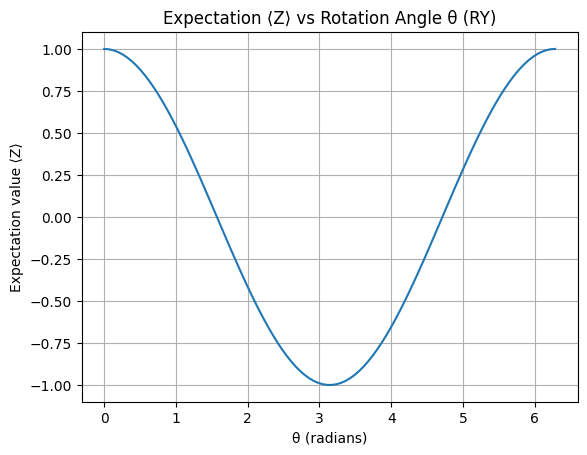

In [ ]:
# Install PennyLane
!pip install pennylane

# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define a single-qubit device
dev = qml.device("default.qubit", wires=1)

# Define the quantum circuit with a variable angle
@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RY(theta, wires=0)  # You can switch to RX or RZ here
    return qml.expval(qml.PauliZ(0))  # Measure expectation of PauliZ

# Test: Evaluate the circuit at a single angle
angle = np.pi / 4
expect_val = rotation_circuit(angle)
print(f"🔹 Expectation value at θ = π/4: {expect_val:.3f}")

# Plot expectation vs. angle
angles = np.linspace(0, 2 * np.pi, 100)
expectations = [rotation_circuit(a) for a in angles]

plt.plot(angles, expectations)
plt.title("Expectation ⟨Z⟩ vs Rotation Angle θ (RY)")
plt.xlabel("θ (radians)")
plt.ylabel("Expectation value ⟨Z⟩")
plt.grid(True)
plt.show()


## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

🔧 Optimization Log:
Step  1 | θ = 0.5479 | Cost = 0.877583
Step  2 | θ = 0.6000 | Cost = 0.853598
Step  3 | θ = 0.6565 | Cost = 0.825315
Step  4 | θ = 0.7175 | Cost = 0.792131
Step  5 | θ = 0.7833 | Cost = 0.753427
Step  6 | θ = 0.8539 | Cost = 0.708595
Step  7 | θ = 0.9292 | Cost = 0.657084
Step  8 | θ = 1.0094 | Cost = 0.598447
Step  9 | θ = 1.0940 | Cost = 0.532410
Step 10 | θ = 1.1828 | Cost = 0.458936
Step 11 | θ = 1.2754 | Cost = 0.378292
Step 12 | θ = 1.3711 | Cost = 0.291105
Step 13 | θ = 1.4691 | Cost = 0.198387
Step 14 | θ = 1.5686 | Cost = 0.101525
Step 15 | θ = 1.6686 | Cost = 0.002217
Step 16 | θ = 1.7681 | Cost = -0.097627
Step 17 | θ = 1.8662 | Cost = -0.196028
Step 18 | θ = 1.9618 | Cost = -0.291089
Step 19 | θ = 2.0543 | Cost = -0.381145
Step 20 | θ = 2.1428 | Cost = -0.464869
Step 21 | θ = 2.2269 | Cost = -0.541335
Step 22 | θ = 2.3061 | Cost = -0.610035
Step 23 | θ = 2.3803 | Cost = -0.670841
Step 24 | θ = 2.4493 | Cost = -0.723944
Step 25 | θ = 2.5131 | Cost = -0.76

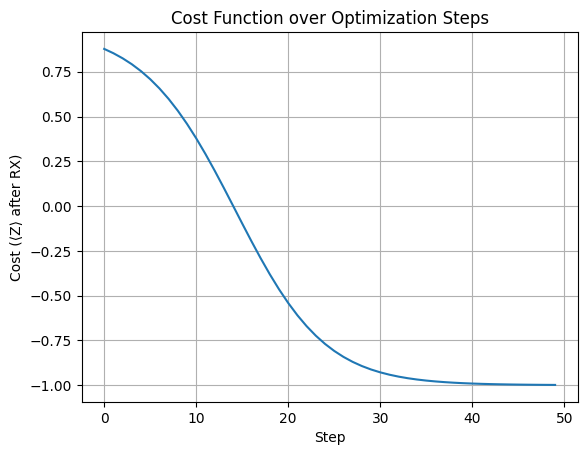

In [ ]:
# Install PennyLane
!pip install pennylane

# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set up 1-qubit device
dev = qml.device("default.qubit", wires=1)

# Define quantum circuit with parameter
@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))  # Expectation of PauliZ

# Define cost function: we want to minimize this
def cost(theta):
    return circuit(theta)

# Initialize parameter and optimizer
theta = np.array(0.5, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Optimization loop
steps = 50
costs = []

print("🔧 Optimization Log:")
for i in range(steps):
    theta, curr_cost = opt.step_and_cost(cost, theta)
    costs.append(curr_cost)
    print(f"Step {i+1:2d} | θ = {theta:.4f} | Cost = {curr_cost:.6f}")

print(f"\n✅ Optimal θ: {theta:.4f}")
print(f"✅ Minimum Cost: {cost(theta):.6f}")

# Plot the cost function curve
plt.plot(range(steps), costs)
plt.title("Cost Function over Optimization Steps")
plt.xlabel("Step")
plt.ylabel("Cost (⟨Z⟩ after RX)")
plt.grid(True)
plt.show()


# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.

🔹 qml.probs(): [0.85355339 0.14644661]
🔸 qml.expval(): 0.7071067811865475
🔹 qml.sample() (first 10): [0 0 0 0 0 0 1 1 0 0]
🔸 Sample Counts: {np.int64(0): 856, np.int64(1): 144}


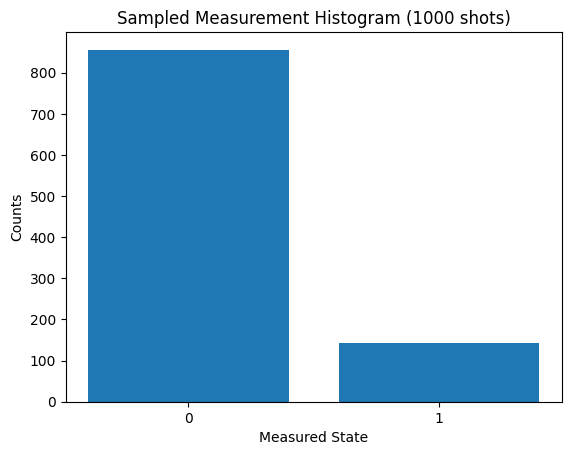

In [ ]:
# Install PennyLane
!pip install pennylane

# Imports
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import collections

# Angle for rotation
theta = np.pi / 4  # 45 degrees

# Device without shots (analytic mode for probs and expval)
dev_analytic = qml.device("default.qubit", wires=1)

# Device with shots (sampling mode)
dev_sample = qml.device("default.qubit", wires=1, shots=1000)

# Circuit for qml.probs and qml.expval
@qml.qnode(dev_analytic)
def circuit_probs_expval(theta):
    qml.RY(theta, wires=0)
    return qml.probs(wires=0), qml.expval(qml.PauliZ(0))

# Circuit for qml.sample
@qml.qnode(dev_sample)
def circuit_sample(theta):
    qml.RY(theta, wires=0)
    return qml.sample(wires=0)

# Run all three types of measurements
probs, expval = circuit_probs_expval(theta)
samples = circuit_sample(theta)

# Output results
print("🔹 qml.probs():", probs)
print("🔸 qml.expval():", expval)
print("🔹 qml.sample() (first 10):", samples[:10])

# Count sample results (0 or 1)
counts = collections.Counter(samples)
print("🔸 Sample Counts:", dict(counts))

# Plot sample histogram
labels = ['0', '1']
values = [counts.get(0, 0), counts.get(1, 0)]
plt.bar(labels, values)
plt.title("Sampled Measurement Histogram (1000 shots)")
plt.xlabel("Measured State")
plt.ylabel("Counts")
plt.show()


Why Is probs() Deterministic but sample() Random?

qml.probs() is computed mathematically from the quantum state vector, so it always returns the same result given the same input — like getting the exact dice odds (⅙ for each face).

qml.sample() mimics what you would see on a real quantum computer: you don’t get probabilities directly — you get measurement results (0 or 1) with some randomness. Re-running it will yield different results, unless you set a random seed.